# First Project: Writing a Data Scientist Blog Post


In [1]:
!pip install wordcloud

In [50]:
#Importing libraries and import data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
%matplotlib inline

df_bos = pd.read_csv('./Boston Airbnb/listings.csv')
df_sea = pd.read_csv('./Seattle Airbnb/listings.csv')

# Business Understanding

## 1. Are there different characteristics influencing the price of an Airbnb in Seattle and in Boston?

## 2. What characteristics influence pricing inside the same city?

## 3. What characteristics influence the rating of an Airbnb the most?

# Data Understanding

## Boston

In [3]:
df_bos.shape

(3585, 95)

In [4]:
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [5]:
df_bos = df_bos.dropna(thresh= int(0.8*df_bos.shape[0]), axis = 1)
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   description                       3585 non-null   object 
 7   experiences_offered               3585 non-null   object 
 8   thumbnail_url                     2986 non-null   object 
 9   medium_url                        2986 non-null   object 
 10  picture_url                       3585 non-null   object 
 11  xl_picture_url                    2986 non-null   object 
 12  host_i

In [6]:
df_bos = df_bos.dropna(thresh= int(0.8*df_bos.shape[1]), axis = 0)
df_bos.shape

(3585, 68)

In [7]:
df_bos.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,thumbnail_url,medium_url,...,availability_90,availability_365,calendar_last_scraped,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Cozy, sunny, family home. Master bedroom high...",none,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,...,0,0,2016-09-06,0,f,f,moderate,f,f,1
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,none,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,...,84,359,2016-09-06,36,f,t,moderate,f,f,1
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,...,61,319,2016-09-06,41,f,f,moderate,t,f,1
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Come experience the comforts of home away from...,none,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,...,26,98,2016-09-06,1,f,f,moderate,f,f,1
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","My comfy, clean and relaxing home is one block...",none,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,...,59,334,2016-09-06,29,f,f,flexible,f,f,1


## Seattle

In [8]:
df_sea.shape

(3818, 92)

In [9]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
df_sea = df_sea.dropna(thresh= int(0.8*df_sea.shape[0]), axis = 1)
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   thumbnail_url                     3498 non-null   object 
 10  medium_url                        3498 non-null   object 
 11  picture_url                       3818 non-null   object 
 12  xl_pic

In [11]:
df_sea = df_sea.dropna(thresh= int(0.8*df_sea.shape[1]), axis = 0)
df_sea.shape

(3814, 81)

In [12]:
df_sea.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,thumbnail_url,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,NaN,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,NaN,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89


# Data Preparation

## Boston 

Get a separate Dataframe with all columns of the type "object" to take a look at them individually and identify methods to convert them where necessary. The changes will be made to the original Dataframe

In [13]:
bos_obj = df_bos.select_dtypes(include=['object']).copy()
bos_obj.shape

(3585, 48)

In [14]:
df_bos = bos_obj = bos_obj.drop(list(bos_obj.filter(regex= "url")), axis = 1)
bos_obj.shape

(3585, 40)

In [15]:
bos_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   last_scraped                      3585 non-null   object
 1   name                              3585 non-null   object
 2   summary                           3442 non-null   object
 3   description                       3585 non-null   object
 4   experiences_offered               3585 non-null   object
 5   host_name                         3585 non-null   object
 6   host_since                        3585 non-null   object
 7   host_location                     3574 non-null   object
 8   host_response_time                3114 non-null   object
 9   host_response_rate                3114 non-null   object
 10  host_acceptance_rate              3114 non-null   object
 11  host_is_superhost                 3585 non-null   object
 12  host_neighbourhood  

In [16]:
pd.set_option('display.max_columns', None)
bos_obj.head()

,last_scraped,name,summary,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,calendar_last_scraped,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Cozy, sunny, family home. Master bedroom high...",none,Virginia,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$0.00,2 weeks ago,2016-09-06,f,f,moderate,f,f
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,none,Andrea,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$0.00,a week ago,2016-09-06,f,t,moderate,f,f
2,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,Phil,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,"['email', 'phone', 'reviews', 'jumio']",t,t,"Ardale St., Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,$20.00,5 days ago,2016-09-06,f,f,moderate,t,f
3,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Come experience the comforts of home away from...,none,Meghna,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",NaN,Roslindale,Boston,MA,NaN,Boston,"Boston, MA",US,United States,f,House,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,$25.00,a week ago,2016-09-06,f,f,moderate,f,f
4,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","My comfy, clean and relaxing home is one block...",none,Linda,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,$0.00,2 weeks ago,2016-09-06,f,f,flexible,f,f


### Convert prices and percentages to float

In [17]:
df_bos['price'] = bos_obj['price'].str.replace('$', '')
df_bos['price'] = bos_obj['price'].str.replace(',', '')
df_bos['price'] = bos_obj['price'].astype(float)

C:\Users\beckmp\AppData\Local\Temp/ipykernel_27780/287548175.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bos['price'] = bos_obj['price'].str.replace('$', '')


In [18]:
df_bos['extra_people'] = bos_obj['extra_people'].str.replace('$', '')
df_bos['extra_people'] = bos_obj['extra_people'].str.replace(',', '')
df_bos['extra_people'] = bos_obj['extra_people'].astype(float)

C:\Users\beckmp\AppData\Local\Temp/ipykernel_27780/3102410929.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bos['extra_people'] = bos_obj['extra_people'].str.replace('$', '')


In [19]:
print(df_bos['price'])

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64


In [20]:
print(df_bos['extra_people'])

0        0.0
1        0.0
2       20.0
3       25.0
4        0.0
        ... 
3580    24.0
3581     0.0
3582     0.0
3583    30.0
3584    30.0
Name: extra_people, Length: 3585, dtype: float64


In [21]:
df_bos['host_response_rate'] = bos_obj['host_response_rate'].str.rstrip("%").astype(float)/100
df_bos['host_acceptance_rate'] = bos_obj['host_acceptance_rate'].str.rstrip("%").astype(float)/100


In [22]:
print(df_bos['host_response_rate'])

0        NaN
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
3580    0.96
3581    0.10
3582    0.78
3583    1.00
3584    1.00
Name: host_response_rate, Length: 3585, dtype: float64


### Label Encoding

In [23]:
pd.get_dummies(data=df_bos, columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'])

,last_scraped,name,summary,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,calendar_last_scraped,cancellation_policy,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,requires_license_f,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Cozy, sunny, family home. Master bedroom high...",none,Virginia,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,Roslindale,"['email', 'phone', 'facebook', 'reviews']","Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,0.0,2 weeks ago,2016-09-06,moderate,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,none,Andrea,2012-06-07,"Boston, Massachusetts, United States",within an hour,1.00,1.00,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...","Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,Apartment,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,0.0,a week ago,2016-09-06,moderate,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0
2,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,Phil,2009-05-11,"Boston, Massachusetts, United States",within a few hours,1.00,0.88,Roslindale,"['email', 'phone', 'reviews', 'jumio']","Ardale St., Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,Apartment,Private room,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,20.0,5 days ago,2016-09-06,moderate,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0
3,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Come experience the comforts of home away from...,none,Meghna,2013-04-21,"Boston, Massachusetts, United States",within a few hours,1.00,0.50,NaN,"['email', 'phone', 'reviews']","Boston, MA, United States",NaN,Roslindale,Boston,MA,NaN,Boston,"Boston, MA",US,United States,House,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,25.0,a week ago,2016-09-06,moderate,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0
4,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","My comfy, clean and relaxing home is one block...",none,Linda,2014-05-11,"Boston, Massachusetts, United States",within an hour,1.00,1.00,Roslindale,"['email', 'phone', 'reviews', 'kba']","Durnell Avenue, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,House,Private room,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,0.0,2 weeks ago,2016-09-06,flexible,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,5 min walking to Orange Line subway with 2 sto...,none,Joe,2014-07-31,"Somerville, Massachusetts, United States",within an hour,0.96,1.00,Somer

## Seattle 

Get a separate Dataframe with all columns of the type "object" to take a look at them individually and identify methods to convert them where necessary. The changes will be made to the original Dataframe

In [24]:
sea_obj = df_sea.select_dtypes(include=['object']).copy()
sea_obj.shape

(3814, 53)

In [25]:
df_sea = sea_obj = sea_obj.drop(list(sea_obj.filter(regex= "url")), axis = 1)
sea_obj.shape

(3814, 45)

In [26]:
sea_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3817
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   last_scraped                      3814 non-null   object
 1   name                              3814 non-null   object
 2   summary                           3637 non-null   object
 3   space                             3247 non-null   object
 4   description                       3814 non-null   object
 5   experiences_offered               3814 non-null   object
 6   host_name                         3814 non-null   object
 7   host_since                        3814 non-null   object
 8   host_location                     3808 non-null   object
 9   host_response_time                3295 non-null   object
 10  host_response_rate                3295 non-null   object
 11  host_is_superhost                 3814 non-null   object
 12  host_neighbourhood  

In [27]:
pd.set_option('display.max_columns', None)
sea_obj.head()

,last_scraped,name,summary,space,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$25.00,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$0.00,6 months ago,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$15.00,7 weeks ago,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


### Convert prices and percentages to float

In [28]:
df_sea['price'] = sea_obj['price'].str.replace('$', '')
df_sea['price'] = sea_obj['price'].str.replace(',', '')
df_sea['price'] = sea_obj['price'].astype(float)

C:\Users\beckmp\AppData\Local\Temp/ipykernel_27780/3728821412.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sea['price'] = sea_obj['price'].str.replace('$', '')


In [29]:
df_sea['extra_people'] = sea_obj['extra_people'].str.replace('$', '')
df_sea['extra_people'] = sea_obj['extra_people'].str.replace(',', '')
df_sea['extra_people'] = sea_obj['extra_people'].astype(float)

C:\Users\beckmp\AppData\Local\Temp/ipykernel_27780/3888843905.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sea['extra_people'] = sea_obj['extra_people'].str.replace('$', '')


In [30]:
print(df_sea['price'])

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3814, dtype: float64


In [31]:
print(df_sea['extra_people'])

0        5.0
1        0.0
2       25.0
3        0.0
4       15.0
        ... 
3813     0.0
3814    25.0
3815    20.0
3816     0.0
3817     0.0
Name: extra_people, Length: 3814, dtype: float64


In [32]:
df_sea['host_response_rate'] = sea_obj['host_response_rate'].str.rstrip("%").astype(float)/100

In [33]:
print(df_sea['host_response_rate'])

0       0.96
1       0.98
2       0.67
3        NaN
4       1.00
        ... 
3813    0.99
3814    1.00
3815     NaN
3816    1.00
3817    1.00
Name: host_response_rate, Length: 3814, dtype: float64


In [34]:
pd.get_dummies(data=df_sea, columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'])

,last_scraped,name,summary,space,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,jurisdiction_names,cancellation_policy,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,requires_license_f,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,0.96,Queen Anne,"['email', 'phone', 'reviews', 'kba']","Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,5.0,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,WASHINGTON,moderate,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,0.98,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...","7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,0.0,today,t,2016-01-04,2013-08-19,2015-12-29,WASHINGTON,strict,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,0.67,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']","West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,25.0,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,WASHINGTON,strict,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0
3,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...","8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,6 months ago,t,2016-01-04,NaN,NaN,WASHINGTON,flexible,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0
4,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,1.00,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']","14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4

# Data Modelling

### 1. Are there different characteristics influencing the price of an Airbnb in Seattle and in Boston?

Comparing what characteristics high- and low-priced Airbnbs have in Boston and in Seattle

Boston

In [35]:
df_bos['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [36]:
bos_high_price = df_bos[df_bos['price'] >= 220]

In [37]:
bos_high_price.head()

,last_scraped,name,summary,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,calendar_last_scraped,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Cozy, sunny, family home. Master bedroom high...",none,Virginia,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,0.0,2 weeks ago,2016-09-06,f,f,moderate,f,f
9,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,This is a cozy and spacious two bedroom unit w...,none,Damon,2012-12-18,"Boston, Massachusetts, United States",within an hour,1.0,1.0,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,25.0,today,2016-09-06,f,f,strict,f,f
55,2016-09-07,Private House in Roslindale/Boston/Arboretum,Stay in a well cared for 1920's farmhouse that...,Stay in a well cared for 1920's farmhouse that...,none,Laura,2016-04-19,"Boston, Massachusetts, United States",within an hour,1.0,1.0,f,Roslindale,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"Knoll Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",285.0,25.0,today,2016-09-06,f,f,strict,f,f
100,2016-09-07,4 bedroom Victorian Condo unit,NaN,"Featuring a fully equipped kitchen, this four-...",none,Lita,2011-12-23,"Boston, Massachusetts, United States",within an hour,1.0,1.0,f,Jamaica Plain,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"South Huntington Avenue, Boston, MA 02130, Uni...",Jamaica Plain,Jamaica Plain,Boston,MA,02130,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",429.0,15.0,today,2016-09-06,f,f,strict,f,t
107,2016-09-07,Woodland Sanctuary next to Orange Line T,Nestled at the top of a dead end street right ...,Nestled at the top of a dead end street right ...,none,Isaac,2016-09-05,US,NaN,NaN,NaN,f,Jamaica Plain,"['email', 'phone', 'linkedin', 'jumio']",t,t,"Weld Hill Street, Boston, MA 02130, United States",Jamaica Plain,Jamaica Plain,Boston,MA,02130,Boston,"Boston, MA",US,United States,t,Condominium,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",267.0,0.0,today,2016-09-06,f,t,flexible,f,f


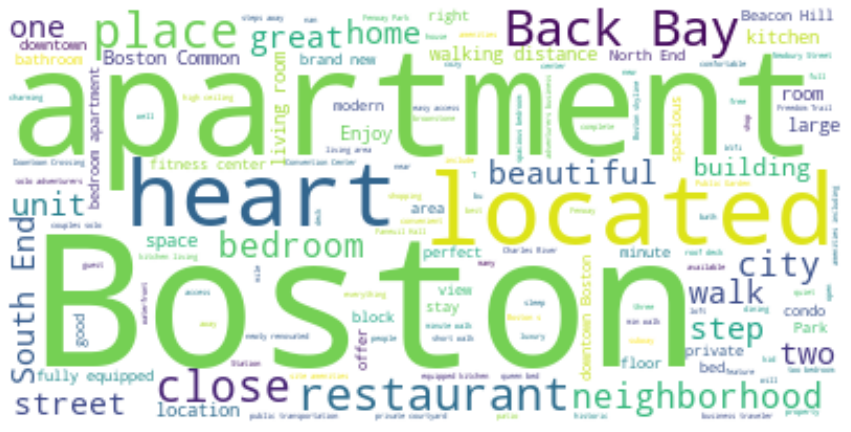

In [38]:
text = " ".join( description for description in bos_high_price.summary.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

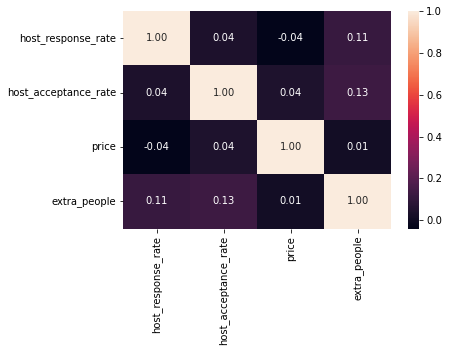

In [51]:
sns.heatmap(bos_high_price.corr(), annot=True, fmt=".2f");

In [52]:
bos_high_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 3572
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   last_scraped                      914 non-null    object 
 1   name                              914 non-null    object 
 2   summary                           843 non-null    object 
 3   description                       914 non-null    object 
 4   experiences_offered               914 non-null    object 
 5   host_name                         914 non-null    object 
 6   host_since                        914 non-null    object 
 7   host_location                     913 non-null    object 
 8   host_response_time                796 non-null    object 
 9   host_response_rate                796 non-null    float64
 10  host_acceptance_rate              796 non-null    float64
 11  host_is_superhost                 914 non-null    object 
 12  host_ne

In [54]:
bos_high_price.shape

(914, 40)

Seattle

In [39]:
df_sea['price'].describe()

count    3814.000000
mean      127.966702
std        90.272146
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [40]:
sea_high_price = df_sea[df_sea['price'] >= 150]
sea_high_price.head()

,last_scraped,name,summary,space,description,experiences_offered,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,0.98,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,0.0,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,0.67,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,25.0,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
4,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,1.00,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,15.0,7 weeks ago,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f
9,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,0.98,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,0.0,today,t,2016-01-04,2014-04-27,2015-12-20,f,WASHINGTON,f,strict,t,t
12,2016-01-04,Open Plan 2bdr/1bath in Queen Anne,Spacious apt in popular Seattle neighborhood. ...,This apartment is in a quiet and friendly city...,Spacious apt in popular Seattle neighborhood. ...,none,Pat & Roberta,2014-08-13,"Seattle, Washington, United States",within an hour,1.00,t,NaN,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"West Howe Street, Seattle, WA 98119, United St...",NaN,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",245.0,0.0,2 weeks ago,t,2016-01-04,2014-11-09,2015-10-02,f,WASHINGTON,f,moderate,f,f


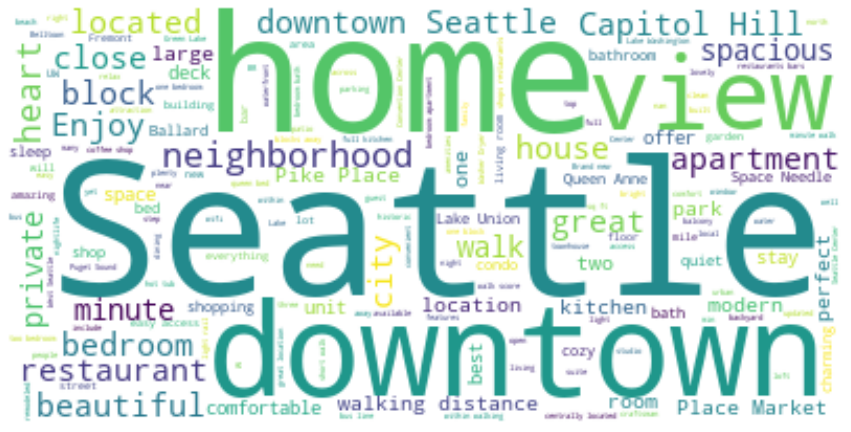

In [41]:
text = " ".join( description for description in sea_high_price.summary.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
sea_high_price.corr(method='spearman')

,host_response_rate,price,extra_people
host_response_rate,1.000000,-0.005960,0.120192
price,-0.005960,1.000000,0.042964
extra_people,0.120192,0.042964,1.000000


In [48]:
bos_high_price.corrwith(sea_high_price)

host_response_rate      0.025599
price                  -0.096190
extra_people           -0.007430
host_acceptance_rate         NaN
dtype: float64

# Evaluation and Results